In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import webbrowser
import os

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\yogesh
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
apps_df=pd.read_csv('Play Store Data.csv')
reviews_df=pd.read_csv('User Reviews.csv')

In [4]:
apps_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
apps_df=apps_df.dropna(subset=['Rating'])
for column in apps_df.columns:
    apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)
apps_df.drop_duplicates(inplace=True)
apps_df=apps_df[apps_df['Rating']<=5]
reviews_df.dropna(subset='Translated_Review',inplace=True)

C:\Users\yogesh singh\AppData\Local\Temp\ipykernel_9588\306937116.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df[column].fillna(apps_df[column].mode()[0],inplace=True)


In [7]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
apps_df['Price']=apps_df['Price'].astype(str)
apps_df['Price']=apps_df['Price'].str.replace('$','').astype(float)


In [9]:
# Ensure all values in the 'Installs' column are strings
apps_df['Installs'] = apps_df['Installs'].astype(str)

# Remove commas and plus signs, then convert to integers
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)



In [10]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
merged_df=pd.merge(apps_df,reviews_df,on='App',how='inner')

In [12]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [13]:
#Data Transformation
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k',''))/1024
    else:
        return np.nan
apps_df['Size']=apps_df['Size'].apply(convert_size)
            

In [14]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
#logarthmic
apps_df['Log_Installs']=np.log(apps_df['Installs'])


In [16]:
apps_df['Reviews']=apps_df['Reviews'].astype(int)

In [17]:
apps_df['Log_Reviews']=np.log(apps_df['Reviews'])

In [18]:
apps_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Log_Installs      float64
Log_Reviews       float64
dtype: object

In [19]:
def rating_group(rating):
    if rating >=4:
        return 'Top rated app'
    elif rating>=3:
        return 'Above average'
    elif rating >=2:
        return 'Average'
    else:
        return 'Below Average'
apps_df['Rating_Group']=apps_df['Rating'].apply(rating_group)

In [20]:
#Revenue column
apps_df['Revenue']=apps_df['Price']*apps_df['Installs']

In [21]:
sia= SentimentIntensityAnalyzer()

In [22]:
#Polarity scores in SIA
#Positive,Negative,Neutral and Compound :-1 - very negative, +1 - very positive

In [23]:
review= 'This app is amazing! I love the new feature.'
sentiment_score=sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 0.42, 'pos': 0.58, 'compound': 0.8516}


In [24]:
review='This app is very bad! I hate the new feature.'
sentiment_score=sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.8427}


In [25]:
review='This app is okay!.'
sentiment_score=sia.polarity_scores(review)
print(sentiment_score)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [26]:
reviews_df['Sentiment_Score'] = reviews_df['Translated_Review'].apply(lambda x : sia.polarity_scores(str(x))['compound'])

In [27]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [28]:
apps_df['Last Updated']= pd.to_datetime(apps_df['Last Updated'],errors='coerce')

In [29]:
apps_df['Year']= apps_df['Last Updated'].dt.year

In [30]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_Installs,Log_Reviews,Rating_Group,Revenue,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,9.210340,5.068904,Top rated app,0.0,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,13.122363,6.874198,Above average,0.0,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,15.424948,11.379508,Top rated app,0.0,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,17.727534,12.281384,Top rated app,0.0,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,11.512925,6.874198,Top rated app,0.0,2018


In [31]:
html_files_path= "./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [32]:
plot_containers=""

In [33]:
def save_plot_as_html(fig,filename,insights):
    global plot_containers
    filepath= os.path.join(html_files_path,filename)
    html_content=pio.to_html(fig,full_html=False,include_plotlyjs='inline')
    
    plot_containers += f"""
    <div class = "plot-container" id="{filename}" onclick ="openPlot('{filename}')">
        <div class="plot"> {html_content}</div>
        <div class="insights">{insights}</div> 
    </div>
    """
    
    fig.write_html(filepath,full_html=False,include_plotlyjs='inline')

In [34]:
plot_width=400
plot_height=300
plot_bg_color='black'
text_color='white'
title_font={'size':16}
axis_font={'size':12}

In [35]:
#fig 1
category_counts= apps_df[('Category')].value_counts().nlargest(10)
fig1= px.bar(
    x=category_counts.index,
    y=category_counts.values,
    labels={'x':'Category','y':'Count'},
    title='Top Categories on Play Store',
    color=category_counts.index,
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
)

fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig1,"Category Graph 1.html","The top categories on the Play Store are dominated by tools,entertainment, and productivity apps")

In [36]:
#fig 2
type_counts= apps_df['Type'].value_counts()
fig2= px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title='App Type Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    width=400,
    height=300
)

fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig2,"Type Graph 2.html","Most apps on playstore are free, indicating a strategy to attract users first and monetize through ads or in app purchases")

In [37]:
#fig 3

fig3= px.histogram(
    apps_df,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#636EFA'],
    width=400,
    height=300
)

fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig3,"Rating Graph 3.html","Ratings are skewed towards higher values, suggesting that most are rated favourly by users")


In [38]:
#fig 4
sentiment_counts= reviews_df['Sentiment_Score'].value_counts()
fig4= px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    labels={'x':'Sentiment score','y':'Count'},
    title='Sentiment Distribution',
    color=sentiment_counts.index,
    color_discrete_sequence=px.colors.sequential.RdPu,
    width=400,
    height=300
)

fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig4,"Sentiment Graph 4.html","Sentiment in reviews show a mix of positive and negative feedback with a slight lean towards positive sentiment ")

In [39]:
#fig 5
installs_by_category= apps_df.groupby('Category')['Installs'].sum().nlargest(10)
fig5= px.bar(
    x=installs_by_category.index,
    y=installs_by_category.values,
    orientation='h',
    labels={'x':'Installs','y':'Category'},
    title='installs_by_category',
    color=installs_by_category.index,
    color_discrete_sequence=px.colors.sequential.Blues,
    width=400,
    height=300
)

fig5.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig5,"Installs Graph 5.html","The categories with the most installs are social and communication apps, reflecting their broad appeal and daily usage  ")

In [40]:
#fig 6
updates_per_year= apps_df['Last Updated'].dt.year.value_counts().sort_index()
fig6= px.line(
    x=updates_per_year.index,
    y=updates_per_year.values,
    orientation='h',
    labels={'x':'year','y':'number of updates'},
    title='Number of updates over thr year',
    color_discrete_sequence=['#AB63FA'],
    width=400,
    height=300
)

fig6.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig6,"Updates Graph 6.html","Updates have been  increasing over the years, showing that developers are activelt maintaining and")

In [41]:
#fig 7
revenue_by_category= apps_df.groupby('Category')['Revenue'].sum().nlargest(10)
fig7= px.bar(
    x=revenue_by_category.index,
    y=revenue_by_category.values,
    labels={'x':'Category','y':'Revenue'},
    title='Revenue_by_category',
    color=revenue_by_category.index,
    color_discrete_sequence=px.colors.sequential.Greens,
    width=400,
    height=300
)

fig7.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig7,"Revenue Graph 7.html","Categories such as business and productivity lead in revenue generation,")

In [42]:
#fig 8
genre_count= apps_df['Genres'].str.split(';',expand=True).stack().value_counts().nlargest(10)
fig8= px.bar(
    x=genre_count.index,
    y=genre_count.values,
    labels={'x':'Genres','y':'Count'},
    title='Top Genre',
    color=genre_count.index,
    color_discrete_sequence=px.colors.sequential.OrRd,
    width=400,
    height=300
)

fig8.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig8,"Genre Graph 8.html","Action and Casual  genres are the most common, reflecting users preference for engageing and easy to play")

In [43]:
#fig 9


fig9= px.scatter(
    apps_df,
    x='Last Updated',
    y='Rating',
    color='Type',
    title='Impact of last update on rating',
    color_discrete_sequence=px.colors.qualitative.Vivid,
    width=400,
    height=300
)

fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig9,"Update Graph 9.html","The Scatter Plot shows a weak correlation between the last update rating, suggesting that more freqent update dont always result in better rating")

In [44]:
#fig 10



fig10= px.box(
    apps_df,
    x='Type',
    y='Rating',
    color='Type',
    title='Rating for Paid vs Fre  Apps',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    width=400,
    height=300
)

fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size':16},
    xaxis=dict(title_font={'size':12}),
    yaxis=dict(title_font={'size':12}),
    margin=dict(l=10,r=10,t=30,b=10)
)

#fig1.update_traces(marker=dict(line=dict(color='white',width=1)))
save_plot_as_html(fig10,"Paid Free Graph 10.html","Paid apps genrerally have higher ratings compared to free apps, suggesting that users expect higher quality from apps they pay for")

In [54]:
#task 1
# Filter for paid apps
paid_apps = apps_df[apps_df['Type'] == 'Paid'].copy()

# Ensure 'Installs' and 'Price' columns are processed correctly
paid_apps['Installs'] = pd.to_numeric(
    paid_apps['Installs'].astype(str).str.replace('[+,]', '', regex=True),
    errors='coerce'
)
paid_apps['Price'] = pd.to_numeric(
    paid_apps['Price'].astype(str).str.replace('$', ''),
    errors='coerce'
)

# Calculate revenue
paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']

# Drop rows with missing or invalid values
paid_apps = paid_apps.dropna(subset=['Revenue', 'Installs', 'Category'])
paid_apps = paid_apps[(paid_apps['Installs'] > 0) & (paid_apps['Revenue'] > 0)]

# fig11
fig11 = px.scatter(
    paid_apps,
    x='Installs',
    y='Revenue',
    color='Category',
    trendline='ols',  # Add trendline to show correlation
    title='Revenue vs Installs for Paid Apps',
    color_discrete_sequence=px.colors.sequential.Plasma,
    width=400,
    height=300
)

fig11.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

# Save plot as HTML with insights
save_plot_as_html(
    fig11,
    "Scatter Plot Revenue vs Installs11.html",
    "This scatter plot visualizes the correlation between revenue and installs for paid apps. The trendline highlights the relationship, with points color-coded by app category."
)


In [62]:
#task 2
# Filter based on the given conditions
filtered_apps = apps_df.copy()

# Convert 'Installs' to numeric
filtered_apps['Installs'] = pd.to_numeric(
    filtered_apps['Installs'].astype(str).str.replace('[+,]', '', regex=True),
    errors='coerce'
)

# Convert 'Last Updated' to datetime
filtered_apps['Last Updated'] = pd.to_datetime(filtered_apps['Last Updated'], errors='coerce')

# Filter apps updated in January
filtered_apps = filtered_apps[filtered_apps['Last Updated'].dt.month == 1]

# Filter apps with size > 10M (assuming Size column exists)
filtered_apps['Size'] = filtered_apps['Size'].astype(str).str.replace('M', '').astype(float)
filtered_apps = filtered_apps[filtered_apps['Size'] > 10]

# Filter apps with average rating >= 4.0
filtered_apps = filtered_apps[filtered_apps['Rating'] >= 4.0]

# Group by Category
grouped_data = filtered_apps.groupby('Category', as_index=False).agg({
    'Rating': 'mean',
    'Reviews': 'sum',
    'Installs': 'sum'
})

# Sort by number of installs and get top 10 categories
top_categories = grouped_data.nlargest(10, 'Installs')

# Create grouped bar chart
fig12 = px.bar(
    top_categories,
    x='Category',
    y=['Rating', 'Reviews'],
    barmode='group',
    title='Average Rating and Total Reviews for Top 10 Categories (Filtered)',
    labels={'value': 'Value', 'variable': 'Metric'},
    color_discrete_sequence=px.colors.qualitative.Set2,
    width=800,
    height=500
)

fig12.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)

# Time-based visibility
def show_graph():
    # Get current time in IST
    ist = pytz.timezone('Asia/Kolkata')
    now = datetime.now(ist)
    if now.hour == 15 or now.hour == 16:  # Between 3 PM and 5 PM IST
        fig12.show()
    else:
        print("This graph is not available outside 3 PM to 5 PM IST.")

# Call function to check time and show graph
show_graph()


This graph is not available outside 3 PM to 5 PM IST.


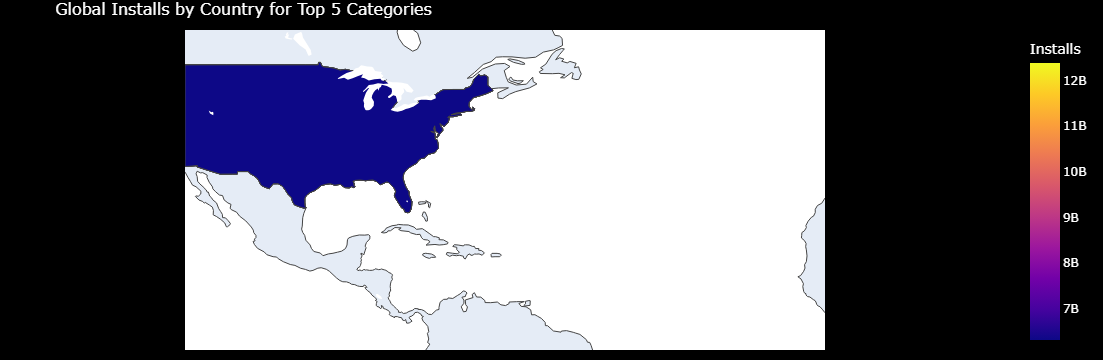

In [79]:
#task 3
import pytz

# Ensure 'Country' exists in the dataset (Dummy example if not present)
if 'Country' not in apps_df.columns:
    apps_df['Country'] = 'United States'  # Assign a default country for testing

# Filter the data
filtered_apps = apps_df.copy()

# Ensure 'Installs' column is numeric
filtered_apps['Installs'] = pd.to_numeric(
    filtered_apps['Installs'].astype(str).str.replace('[+,]', '', regex=True),
    errors='coerce'
)

# Remove categories starting with "A", "C", "G", "S"
excluded_categories = ['A', 'C', 'G', 'S']
filtered_apps = filtered_apps[~filtered_apps['Category'].str.startswith(tuple(excluded_categories))]

# Filter for installs exceeding 1 million
filtered_apps = filtered_apps[filtered_apps['Installs'] > 1_000_000]

# Group by Country and Category
country_data = filtered_apps.groupby(['Country', 'Category'], as_index=False).agg({'Installs': 'sum'})

# Sort by installs and select the top 5 categories globally
top_categories = country_data.groupby('Category', as_index=False)['Installs'].sum().nlargest(5, 'Installs')['Category']
filtered_country_data = country_data[country_data['Category'].isin(top_categories)]

# Create a choropleth map
fig13 = px.choropleth(
    filtered_country_data,
    locations='Country',
    locationmode='country names',
    color='Installs',
    hover_name='Country',
    title='Global Installs by Country for Top 5 Categories',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig13.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin=dict(l=10, r=10, t=30, b=10)
)

# Time-based visibility
def show_graph():
    # Get current time in IST
    ist = pytz.timezone('Asia/Kolkata')
    now = datetime.now(ist)
    if now.hour == 18 or now.hour == 19:  # Between 6 PM and 8 PM IST
        fig13.show()
    else:
        print("This graph is not available outside 6 PM to 8 PM IST.")

# Call function to check time and show graph
show_graph()


In [80]:
#task 4
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
play_store_data_path = 'Play Store Data.csv'  # Update with actual path if needed
apps_df = pd.read_csv(play_store_data_path)

# Filter the dataset
def filter_data(data):
    # Step 1: Filter categories with more than 50 apps
    category_counts = data['Category'].value_counts()
    valid_categories = category_counts[category_counts > 50].index
    data = data[data['Category'].isin(valid_categories)]

    # Step 2: Filter app names containing the letter "C" (case insensitive)
    data = data[data['App'].str.contains('C', case=False, na=False)]

    # Step 3: Exclude apps with fewer than 10 reviews
    data = data[data['Reviews'].apply(pd.to_numeric, errors='coerce') >= 10]

    # Step 4: Include only apps with a rating less than 4.0
    data = data[data['Rating'] < 4.0]

    return data

filtered_apps = filter_data(apps_df)

# Check current time and generate plot only between 4 PM and 6 PM IST
current_time = datetime.now().strftime("%H:%M")
start_time = "16:00"
end_time = "18:00"

if start_time <= current_time <= end_time:
    # Create the violin plot
    plt.figure(figsize=(14, 7))
    sns.violinplot(x='Category', y='Rating', data=filtered_apps, scale='width', inner='quartile')
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Ratings by Category (Filtered)', fontsize=16)
    plt.xlabel('App Category', fontsize=12)
    plt.ylabel('Rating', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("This plot can only be displayed between 4 PM and 6 PM IST.")


This plot can only be displayed between 4 PM and 6 PM IST.


This plot can only be displayed between 4 PM and 6 PM IST.


C:\Users\yogesh singh\AppData\Local\Temp\ipykernel_9588\2648704741.py:74: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



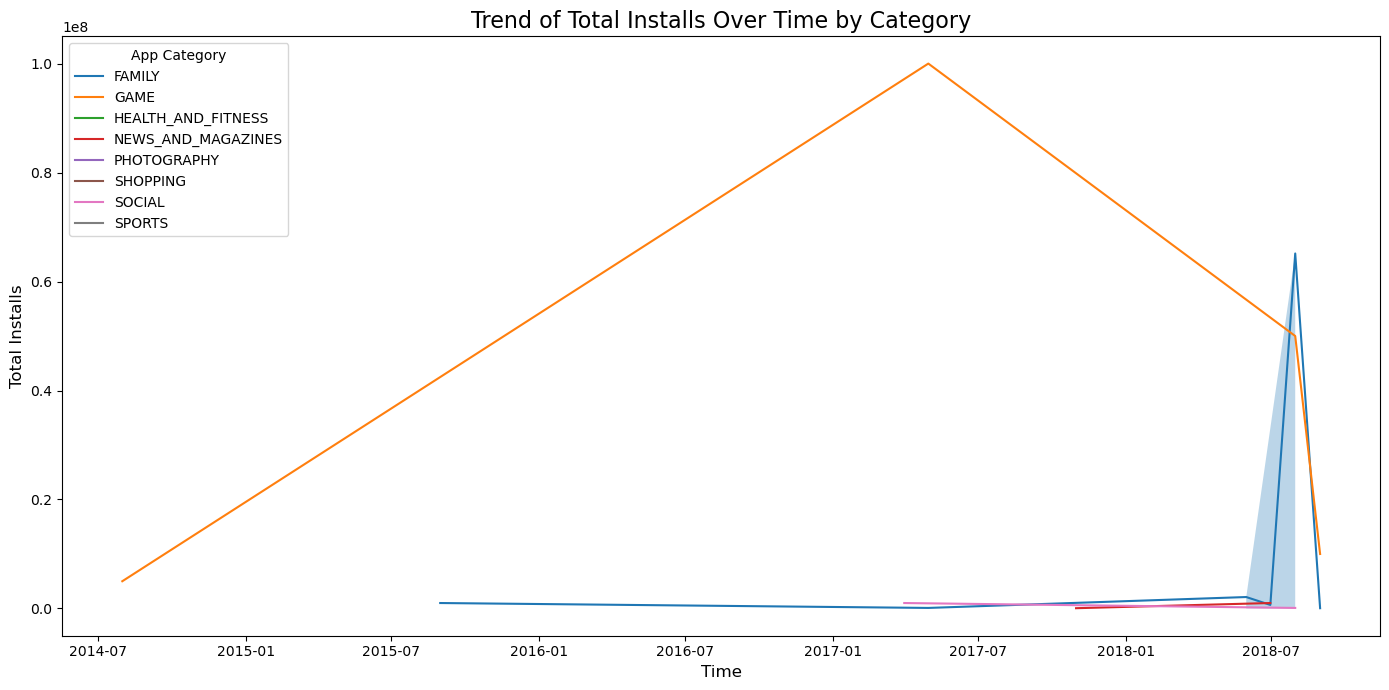

In [81]:
#task 5
from datetime import datetime

# Load the dataset
play_store_data_path = 'Play Store Data.csv'  # Update with actual path if needed
apps_df = pd.read_csv(play_store_data_path)

# Filter the dataset for the violin plot
def filter_data(data):
    # Step 1: Filter categories with more than 50 apps
    category_counts = data['Category'].value_counts()
    valid_categories = category_counts[category_counts > 50].index
    data = data[data['Category'].isin(valid_categories)]

    # Step 2: Filter app names containing the letter "C" (case insensitive)
    data = data[data['App'].str.contains('C', case=False, na=False)]

    # Step 3: Exclude apps with fewer than 10 reviews
    data = data[data['Reviews'].apply(pd.to_numeric, errors='coerce') >= 10]

    # Step 4: Include only apps with a rating less than 4.0
    data = data[data['Rating'] < 4.0]

    return data

filtered_apps = filter_data(apps_df)

# Check current time and generate plot only between 4 PM and 6 PM IST
current_time = datetime.now().strftime("%H:%M")
start_time_violin = "16:00"
end_time_violin = "18:00"

if start_time_violin <= current_time <= end_time_violin:
    # Create the violin plot
    plt.figure(figsize=(14, 7))
    sns.violinplot(x='Category', y='Rating', data=filtered_apps, scale='width', inner='quartile')
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Ratings by Category (Filtered)', fontsize=16)
    plt.xlabel('App Category', fontsize=12)
    plt.ylabel('Rating', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("This plot can only be displayed between 4 PM and 6 PM IST.")

# Filter the dataset for the time series plot
def filter_time_series_data(data):
    # Step 1: Filter by content rating "Teen"
    data = data[data['Content Rating'] == 'Teen']

    # Step 2: Filter app names starting with the letter "E"
    data = data[data['App'].str.startswith('E', na=False)]

    # Step 3: Filter installs greater than 10k
    data['Installs'] = data['Installs'].str.replace(",", "").str.replace("+", "").astype(float)
    data = data[data['Installs'] > 10000]

    # Convert "Last Updated" to datetime
    data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

    return data

filtered_time_series_apps = filter_time_series_data(apps_df)

# Check current time and generate plot only between 6 PM and 9 PM IST
start_time_ts = "18:00"
end_time_ts = "21:00"

if start_time_ts <= current_time <= end_time_ts:
    # Prepare data for time series plot
    time_series_data = (filtered_time_series_apps.groupby([
        pd.Grouper(key='Last Updated', freq='M'), 'Category'
    ])['Installs'].sum().reset_index())

    # Create the time series line chart
    plt.figure(figsize=(14, 7))
    for category, group_data in time_series_data.groupby('Category'):
        plt.plot(group_data['Last Updated'], group_data['Installs'], label=category)

        # Highlight periods of significant growth
        group_data['Growth'] = group_data['Installs'].pct_change() * 100
        significant_growth = group_data[group_data['Growth'] > 20]
        plt.fill_between(significant_growth['Last Updated'], 0, significant_growth['Installs'], alpha=0.3)

    plt.title('Trend of Total Installs Over Time by Category', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Total Installs', fontsize=12)
    plt.legend(title='App Category')
    plt.tight_layout()
    plt.show()
else:
    print("This plot can only be displayed between 6 PM and 9 PM IST.")


In [83]:
plot_container_split= plot_containers.split(',/div>')

In [84]:
if len(plot_container_split)>1:
    final_plot=plot_container_split[-2]+'</div>'
else:
    final_plot=plot_containers

In [85]:
dashboard_html= """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name=viewport" content="width=device-width,initial-scale-1.0">
    <title> Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """


In [86]:
final_html=dashboard_html.format(plots=plot_containers,plot_width=plot_width,plot_height=plot_height)

In [87]:
dashboard_path=os.path.join(html_files_path,"web page.html")

In [88]:
with open(dashboard_path,"w",encoding="utf-8")as f:
    f.write(final_html)

In [89]:
webbrowser.open('file://'+os.path.realpath(dashboard_path))

True